In [46]:
# import libraries

import mediapipe as mp
import cv2
import matplotlib.pyplot as plt

In [2]:
# define mediapipe methods

mp_drawing = mp.solutions.drawing_utils
mp_holistic = mp.solutions.holistic

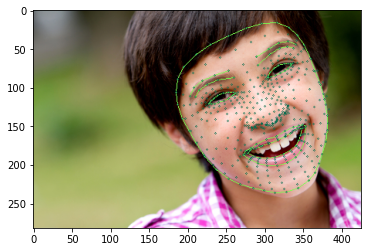

In [52]:
# image

image = cv2.imread("../imgs/happyboy.jpg")
with mp_holistic.Holistic(static_image_mode=True) as holistic:

    image_height, image_width, _ = image.shape
    # Convert the BGR image to RGB before processing.
    results = holistic.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

    # Draw face landmarks on the image.
    annotated_image = image.copy()
    mp_drawing.draw_landmarks(
        annotated_image, results.face_landmarks, mp_holistic.FACE_CONNECTIONS, 
                                 mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1),
                                 mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1))

annotated_image = cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB)
plt.imshow(annotated_image)

In [53]:
results.face_landmarks.landmark[27]

x: 0.5562741160392761
y: 0.3727222681045532
z: -0.02905152179300785

In [34]:
cap.release()
cv2.destroyAllWindows()

In [36]:
# video

cap = cv2.VideoCapture(0)
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    while cap.isOpened():
        ret, frame = cap.read()
        
        # convert color for the landmark prediction
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        
        # get the prediction
        results = holistic.process(image)
        
        # draw the prediction
        mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACE_CONNECTIONS, 
                                 mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1),
                                 mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1))
        
        # convert back to bgr
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
        # flip the img
        image = cv2.flip(image, 1)
        cv2.imshow('Webcam Feed', image)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

cap.release()
cv2.destroyAllWindows()